In [2]:
# https://youtu.be/ba42uYJd8nc

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [7]:
img_heitgh,img_width = 32,32
batch_size = 20
train_data = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size= (img_heitgh,img_width),
    batch_size = 20
)

val_data = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size= (img_heitgh,img_width),
    batch_size = 20
)

test_data = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size= (img_heitgh,img_width),
    batch_size = 20
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


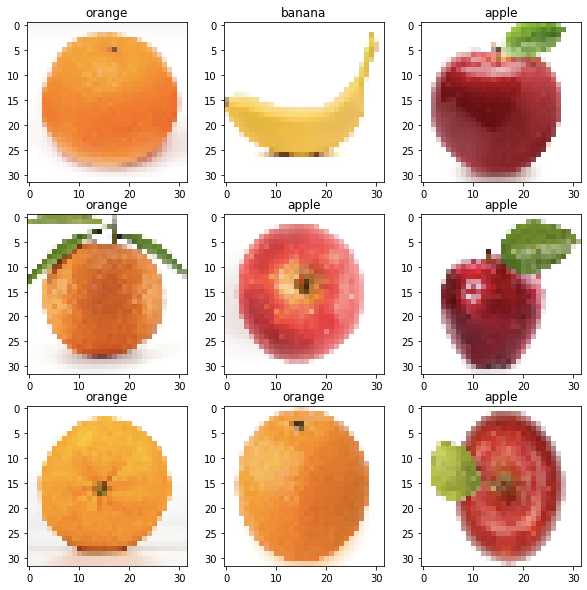

In [15]:
class_names = ['apple','banana','orange']
plt.figure(figsize=(10,10))
for image,labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])

Create the Model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(3)
    ]
)

In [22]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
    )

In [24]:
model.fit(
    train_data,
    validation_data = val_data,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 5s 163ms/step - loss: 0.1371 - accuracy: 0.9565 - val_loss: 0.2957 - val_accuracy: 0.9091
Epoch 2/10
23/23 [==============================] - 5s 160ms/step - loss: 0.1407 - accuracy: 0.9630 - val_loss: 0.2350 - val_accuracy: 0.9242
Epoch 3/10
23/23 [==============================] - 5s 159ms/step - loss: 0.1021 - accuracy: 0.9783 - val_loss: 0.1460 - val_accuracy: 0.9545
Epoch 4/10
23/23 [==============================] - 5s 163ms/step - loss: 0.0955 - accuracy: 0.9696 - val_loss: 0.1941 - val_accuracy: 0.9394
Epoch 5/10
23/23 [==============================] - 3s 86ms/step - loss: 0.0936 - accuracy: 0.9696 - val_loss: 0.3809 - val_accuracy: 0.8939
Epoch 6/10
23/23 [==============================] - 3s 87ms/step - loss: 0.0844 - accuracy: 0.9696 - val_loss: 0.1235 - val_accuracy: 0.9545
Epoch 7/10
23/23 [==============================] - 3s 85ms/step - loss: 0.0759 - accuracy: 0.9761 - val_loss: 0.1494 - val_accuracy: 0.9545
Epoch 8/1

Evaluate against Test Data

In [26]:
model.evaluate(test_data)

7/7 [==============================] - 1s 16ms/step - loss: 0.1482 - accuracy: 0.9538


[0.14819936454296112, 0.9538461565971375]

Predictios on Images

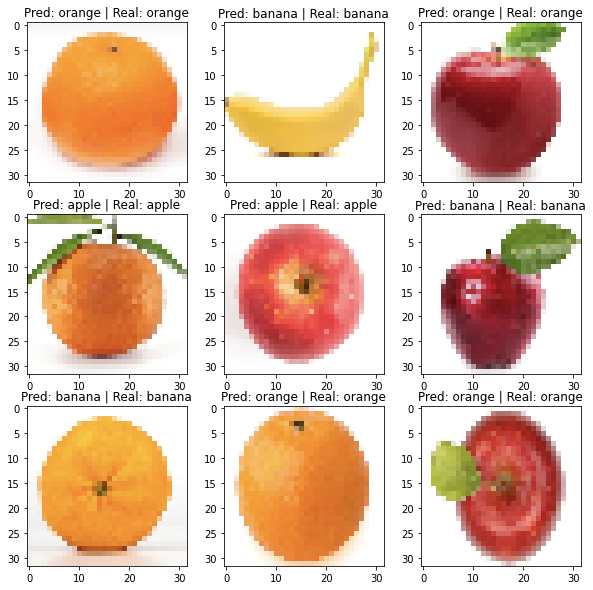

In [31]:

plt.figure(figsize=(10,10))
for images,labels in test_data.take(1):
  classification = model(images)
  # print(classification)

  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    index = np.argmax(classification[i])
    plt.title("Pred: "+ class_names[index] +" | Real: "+class_names[labels[i]])